In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
import nltk
from wordcloud import WordCloud
import textblob as TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Alap
[nltk_data]     Parate\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df = pd.read_csv("clean_data.csv")

In [5]:
df

,tweet,time
0,stock markets script ready for 2022 everything...,2022-01-01T05:08:15.000Z
1,to get rid of excessive greed always think for...,2022-01-01T05:08:15.000Z
2,lessons from 2021 stock market paisa acche equ...,2022-01-01T05:08:15.000Z
3,good morning my state of mind as per nifty lev...,2022-01-01T05:08:15.000Z
4,wishing you all very happy new year may this y...,2022-01-01T05:08:15.000Z
...,...,...
10278,a bouncing monday wont be bad,2022-01-30T23:56:47.000Z
10279,has failed to use captaincy to up his game sha...,2022-01-30T23:56:47.000Z
10280,fii leaving indian markets is being spammed by...,2022-01-30T23:56:47.000Z
10281,event calendar for next week 31 01 2022 india ...,2022-01-30T23:56:47.000Z


In [6]:
df.isnull().sum()

tweet    0
time     0
dtype: int64

In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
str = input()
analyzer.polarity_scores(str).get('compound')

wishing all of you a very happy healthy and wonderful new year let the bygones be bygones let loose all the past failure and pain let s start this change of date with actual change of our fate to a brighter future ahead


0.7408

In [9]:
def pol(text):
    a = analyzer.polarity_scores(text).get('compound')
    return a

In [10]:
df['polarity'] = df['tweet'].apply(pol)

In [11]:
df.sample(10)

,tweet,time,polarity
8219,level 17500 break upside then all exit put pos...,2022-01-25T03:38:24.000Z,0.6705
3167,will come out with good set of numbers this time,2022-01-12T07:10:30.000Z,0.4404
2324,before you plan to become a full time you shou...,2022-01-10T02:37:48.000Z,0.0000
8543,the fact is you can only catch hold of your ow...,2022-01-25T08:03:37.000Z,0.0000
4260,if market doesn t close above 18300 for the da...,2022-01-17T06:33:27.000Z,0.3612
474,ruk ja sab bears ko aaj hi pel0ge to ath kon b...,2022-01-03T10:08:59.000Z,0.0000
4977,from long time i see shift happening from to l...,2022-01-19T04:08:22.000Z,0.0000
9286,buy 7 curmon contracts at 16986 4 sell 6 curmo...,2022-01-27T08:31:49.000Z,0.5106
2865,gm breweries growth rebounds but margins under...,2022-01-11T09:00:06.000Z,-0.2500
1762,4 1 eod was 179 55 6 1 eod was 179 35 are back...,2022-01-06T14:00:58.000Z,0.0000


In [15]:
df.to_csv("sentimental_data.csv",index=False)

In [13]:
df['polarity'] = np.where(df['polarity']>0,1, (np.where(df['polarity'] <0,-1,df['polarity'])))

In [14]:
df.polarity.unique()

array([ 1.,  0., -1.])

<AxesSubplot:xlabel='polarity', ylabel='Count'>

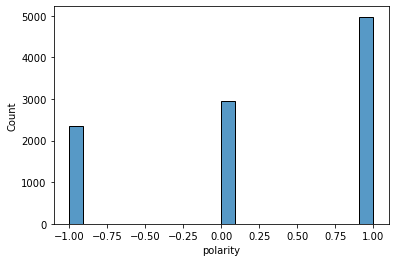

In [14]:
sns.histplot(df['polarity'])

In [26]:
df = pd.read_csv("clean_data.csv")

In [48]:
df['date'] = df['time'].str.split('T',expand=True)[0]

In [50]:
df.drop('time',inplace=True,axis=1)

In [51]:
df

,tweet,date
0,stock markets script ready for 2022 everything...,2022-01-01
1,to get rid of excessive greed always think for...,2022-01-01
2,lessons from 2021 stock market paisa acche equ...,2022-01-01
3,good morning my state of mind as per nifty lev...,2022-01-01
4,wishing you all very happy new year may this y...,2022-01-01
...,...,...
10278,a bouncing monday wont be bad,2022-01-30
10279,has failed to use captaincy to up his game sha...,2022-01-30
10280,fii leaving indian markets is being spammed by...,2022-01-30
10281,event calendar for next week 31 01 2022 india ...,2022-01-30


In [59]:
data=pd.DataFrame(columns=['date','tweet'])

In [60]:
indx=0
get_tweet=""
for i in range(0,len(df)-1):
    get_date=df.date.iloc[i]
    next_date=df.date.iloc[i+1]
    if get_date==next_date:
        get_tweet=get_tweet+df.tweet.iloc[i]+" "
    if get_date!=next_date:
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['date','tweet'])
        data = pd.concat([data, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [61]:
data

,date,tweet
0,2022-01-01,stock markets script ready for 2022 everything...
1,2022-01-02,from what i read omicron has already peaked o...
2,2022-01-03,31 dec 2021 pe ratio 24 11 pe 100dma 17427 50...
3,2022-01-04,03 jan 2022 pe ratio 24 49 pe the s p 500 and...
4,2022-01-05,with follow us now apac opening calls 7606 0 ...
5,2022-01-06,6 1 22 the fed is getting extra hawkish and m...
6,2022-01-07,up by 20 points trading at 17839 vs close at ...
7,2022-01-08,monday s bank nifty prediction do fill your t...
8,2022-01-09,there is nothing called as safe stocks in the...
9,2022-01-10,07 jan 2022 pe ratio 24 75 pe market view for...


In [72]:
import yfinance as yf
tikr = yf.Ticker('^NSEI')
nse = yf.download("^NSEI",start = '2022-01-01', end = '2022-01-29')

[*********************100%***********************]  1 of 1 completed


In [79]:
nse

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
2022-01-10,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400
2022-01-11,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200
2022-01-12,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000
2022-01-13,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700


In [83]:
nse['date'] = nse.index

In [86]:
nse.reset_index(drop=True)

,Open,High,Low,Close,Adj Close,Volume,date
0,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,2022-01-03
1,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,2022-01-04
2,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,2022-01-05
3,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,2022-01-06
4,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,2022-01-07
5,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400,2022-01-10
6,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200,2022-01-11
7,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000,2022-01-12
8,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700,2022-01-13
9,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500,2022-01-14


In [88]:
nse.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
date         datetime64[ns]
dtype: object

In [91]:
data.date = data.date.apply(pd.to_datetime)

In [92]:
data.dtypes

date     datetime64[ns]
tweet            object
dtype: object

In [95]:
final_data = pd.concat(nse,data,join='right')

C:\Users\Alap Parate\AppData\Local\Temp\ipykernel_14412\1242109162.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  final_data = pd.concat(nse,data,join='right')


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [94]:
final_data

,Open,High,Low,Close,Adj Close,Volume,date,tweet
0,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,2022-01-03,31 dec 2021 pe ratio 24 11 pe 100dma 17427 50...
1,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,2022-01-04,03 jan 2022 pe ratio 24 49 pe the s p 500 and...
2,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,2022-01-05,with follow us now apac opening calls 7606 0 ...
3,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,2022-01-06,6 1 22 the fed is getting extra hawkish and m...
4,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,2022-01-07,up by 20 points trading at 17839 vs close at ...
5,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400,2022-01-10,07 jan 2022 pe ratio 24 75 pe market view for...
6,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200,2022-01-11,surges 650 98 points 1 09 to close at 60395 6...
7,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000,2022-01-12,grewal apna setup simple ek motorola ka phone...
8,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700,2022-01-13,srf 3000 incoming watchlist for tomorrow and ...
9,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500,2022-01-14,14 1 22 global cues russia getting ready to i...
